# Packages and functions

In [1]:
import numpy as np
import pickle
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

parent_directory = pathlib.Path().absolute().parent

def running_mean(x, window_size=10):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[window_size:] - cumsum[:-window_size]) / float(window_size)

def cummulative_mean(x):
    cummulative_sum = np.cumsum(x)
    running_mean = cummulative_sum / np.arange(1, len(x) + 1)
    return running_mean

algorithms = ['SAC', 'TD3']
env_names = [
             'Pendulum-v1', 
             'BipedalWalker-v3', 
             'Ant-v4', 
             'HalfCheetah-v4', 
             'Humanoid-v4', 
             'Walker2d-v4' 
             ]


# Plot training rewards 

In [2]:
data = {}
maximum_rewards = {}

for algorithm in algorithms:
    for env_name in env_names:
        for experiment_number in ['01', '02']:
            path = parent_directory.joinpath(f'{algorithm}/checkpoints/{env_name}/')
            with open(path.joinpath(f'{experiment_number}_rewards.pkl'), 'rb') as f:
                rewards = np.array(pickle.load(f))
                data[f'{algorithm}_{env_name}_{experiment_number}'] = rewards
                maximum_rewards[f'{algorithm}_{env_name}_{experiment_number}'] = np.max(rewards)

In [3]:
# print the maximum rewards
for key, value in maximum_rewards.items():
    print(f'{key}: {value:.2f}')

SAC_Pendulum-v1_01: -0.20
SAC_Pendulum-v1_02: -116.61
SAC_BipedalWalker-v3_01: 323.91
SAC_BipedalWalker-v3_02: 315.17
SAC_Ant-v4_01: 5332.41
SAC_Ant-v4_02: 908.54
SAC_HalfCheetah-v4_01: 10161.83
SAC_HalfCheetah-v4_02: 6856.68
SAC_Humanoid-v4_01: 6172.98
SAC_Humanoid-v4_02: 6085.67
SAC_Walker2d-v4_01: 6074.12
SAC_Walker2d-v4_02: 5867.43
TD3_Pendulum-v1_01: -0.35
TD3_Pendulum-v1_02: -116.92
TD3_BipedalWalker-v3_01: 317.94
TD3_BipedalWalker-v3_02: 314.00
TD3_Ant-v4_01: 3439.92
TD3_Ant-v4_02: 3347.48
TD3_HalfCheetah-v4_01: 7513.05
TD3_HalfCheetah-v4_02: 7017.13
TD3_Humanoid-v4_01: 233.13
TD3_Humanoid-v4_02: 159.54
TD3_Walker2d-v4_01: 5908.45
TD3_Walker2d-v4_02: 5005.70


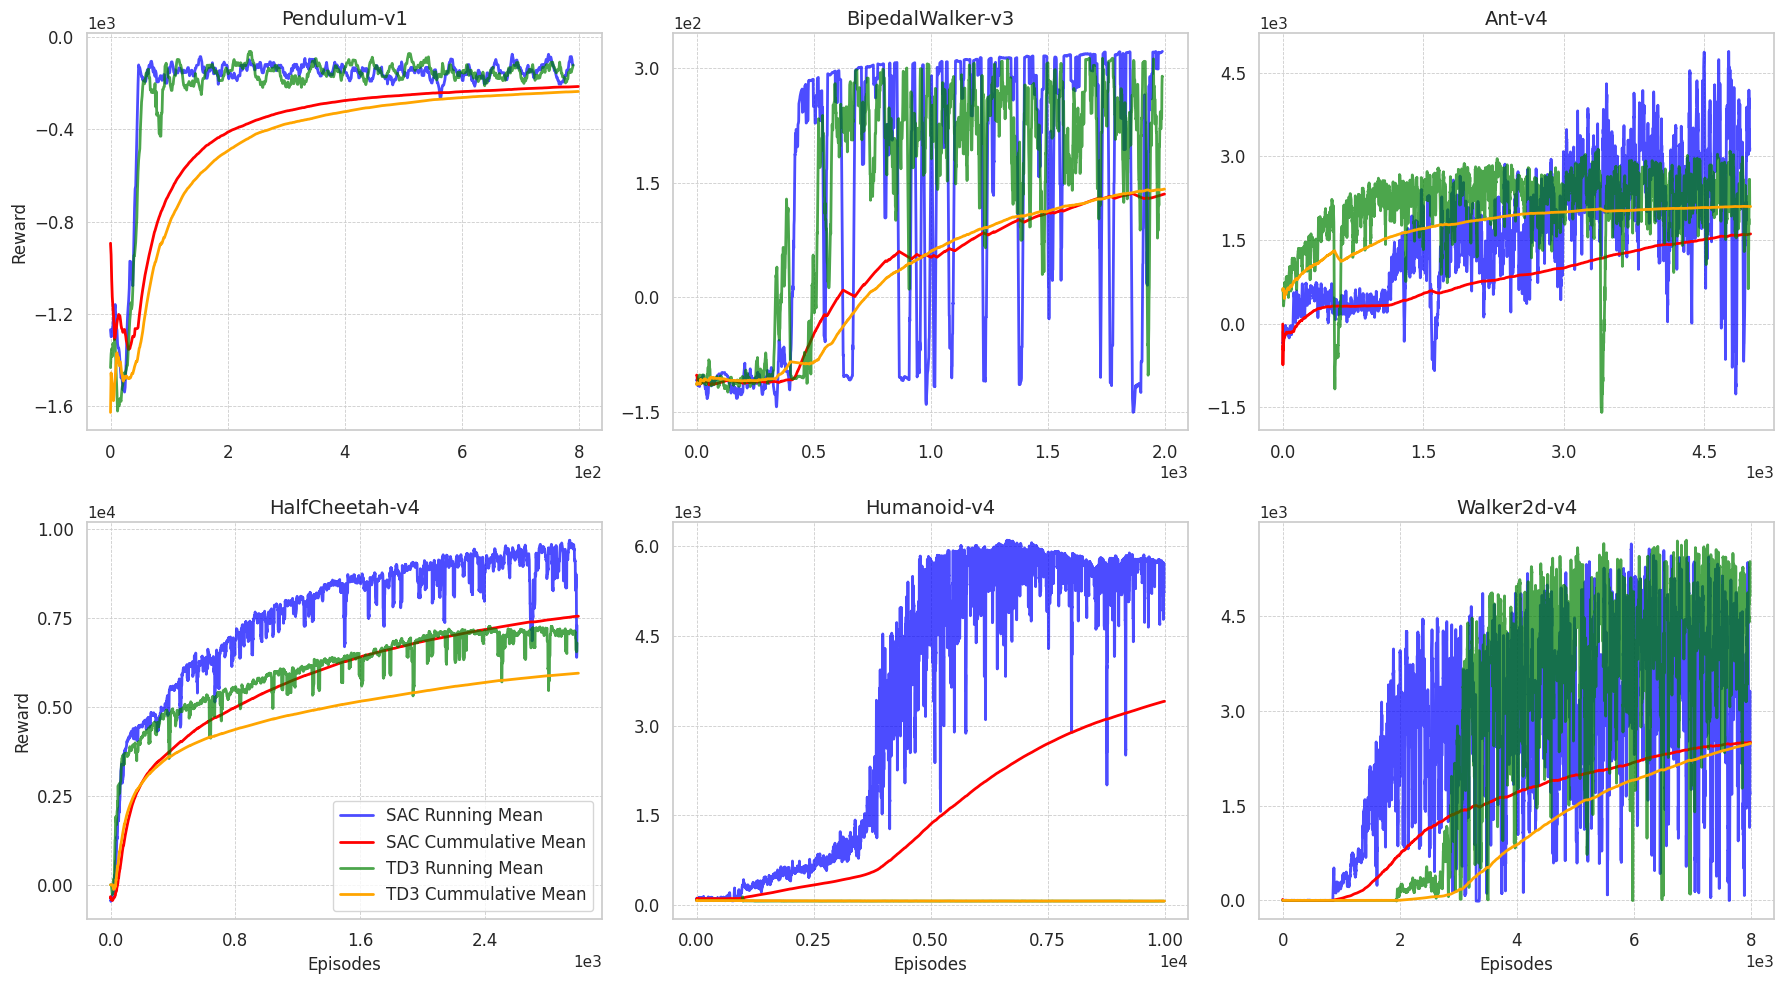

In [8]:
size = len(env_names)

sns.set(style="whitegrid")

half_size = size//2
fig, ax = plt.subplots(2, half_size, figsize=(6*half_size, 10)) 

for a in ax.flatten():
    a.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))
    a.xaxis.set_major_locator(MaxNLocator(nbins=5))
    a.yaxis.set_major_locator(MaxNLocator(nbins=5))
    a.grid(True, which='both', linestyle='--', linewidth=0.6)  
    a.tick_params(axis='both', which='major', labelsize=12) 


experiment_number = '01'
for algorithm in algorithms:
    color_rm = 'blue' if algorithm == 'SAC' else 'green' 
    color_cm = 'red' if algorithm == 'SAC' else 'orange'
    for i, env_name in enumerate(env_names):
        rewards = data[f'{algorithm}_{env_name}_{experiment_number}']
        rewards_rm = running_mean(rewards)
        rewards_cm = cummulative_mean(rewards)
        if algorithm == 'SAC':
            sns.lineplot(x=np.arange(len(rewards_rm)), y=rewards_rm, ax=ax[i//half_size][i%half_size], color=color_rm, linewidth=2, alpha=0.7, label='SAC Running Mean')
            sns.lineplot(x=np.arange(len(rewards_cm)), y=rewards_cm, ax=ax[i//half_size][i%half_size], color=color_cm, linewidth=2, label='SAC Cummulative Mean')
        else:
            sns.lineplot(x=np.arange(len(rewards_rm)), y=rewards_rm, ax=ax[i//half_size][i%half_size], color=color_rm, linewidth=2, alpha=0.7, label='TD3 Running Mean')
            sns.lineplot(x=np.arange(len(rewards_cm)), y=rewards_cm, ax=ax[i//half_size][i%half_size], color=color_cm, linewidth=2, label='TD3 Cummulative Mean')
        ax[i//half_size][i%half_size].set_title(f'{env_name}', fontsize=14)
        if i == 0 or i == half_size + 1:
            ax[i//half_size][0].set_ylabel('Reward', fontsize=12)
        if i//half_size == 1:
            ax[i//half_size][i%half_size].set_xlabel('Episodes', fontsize=12)
            
for i, a in enumerate(ax.flatten()):
    if half_size == 2 and i == 3:
        a.legend(loc='lower right', fontsize=12)
    elif half_size == 3 and i == 3:
        a.legend(loc='lower right', fontsize=12)
    else:
        a.legend().remove()

plt.tight_layout()
plt.show()

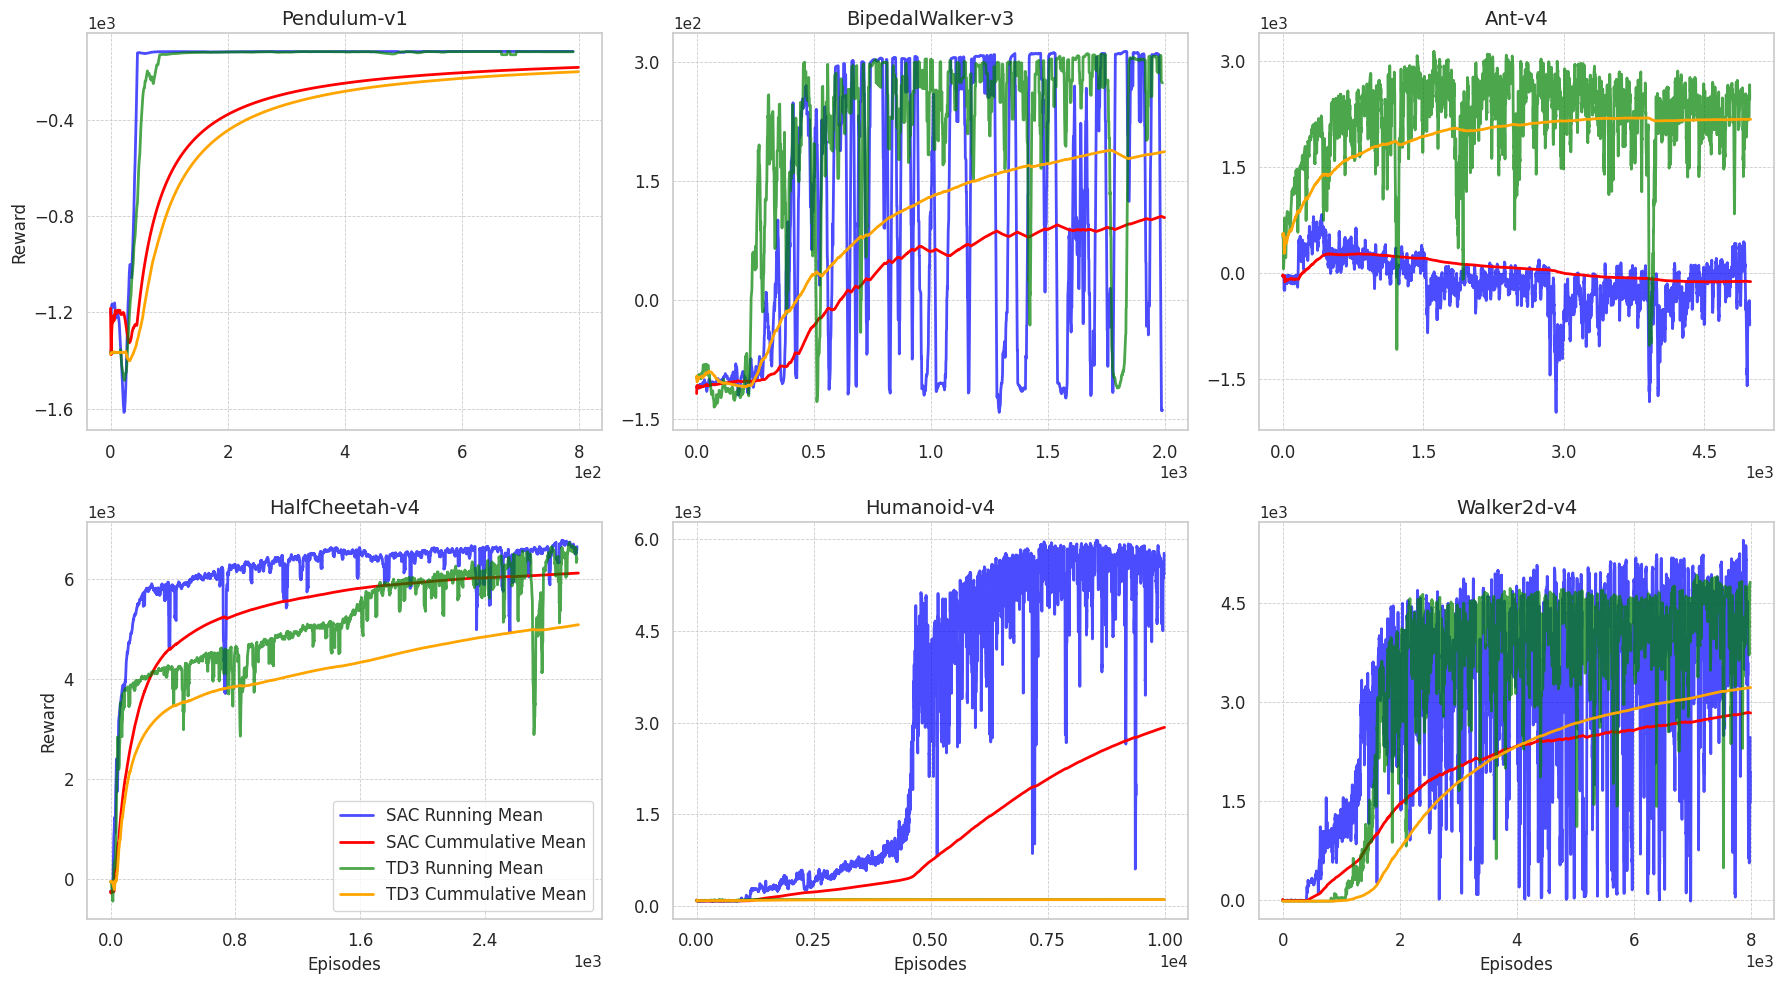

In [9]:
# Use Seaborn's style
sns.set(style="whitegrid")

half_size = size//2
fig, ax = plt.subplots(2, half_size, figsize=(6*half_size, 10)) 

for a in ax.flatten():
    a.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))
    a.xaxis.set_major_locator(MaxNLocator(nbins=5))
    a.yaxis.set_major_locator(MaxNLocator(nbins=5))
    a.grid(True, which='both', linestyle='--', linewidth=0.6)  
    a.tick_params(axis='both', which='major', labelsize=12) 


experiment_number = '02'
for algorithm in algorithms:
    color_rm = 'blue' if algorithm == 'SAC' else 'green' 
    color_cm = 'red' if algorithm == 'SAC' else 'orange'
    for i, env_name in enumerate(env_names):
        rewards = data[f'{algorithm}_{env_name}_{experiment_number}']
        rewards_rm = running_mean(rewards)
        rewards_cm = cummulative_mean(rewards)
        if algorithm == 'SAC':
            sns.lineplot(x=np.arange(len(rewards_rm)), y=rewards_rm, ax=ax[i//half_size][i%half_size], color=color_rm, linewidth=2, alpha=0.7, label='SAC Running Mean')
            sns.lineplot(x=np.arange(len(rewards_cm)), y=rewards_cm, ax=ax[i//half_size][i%half_size], color=color_cm, linewidth=2, label='SAC Cummulative Mean')
        else:
            sns.lineplot(x=np.arange(len(rewards_rm)), y=rewards_rm, ax=ax[i//half_size][i%half_size], color=color_rm, linewidth=2, alpha=0.7, label='TD3 Running Mean')
            sns.lineplot(x=np.arange(len(rewards_cm)), y=rewards_cm, ax=ax[i//half_size][i%half_size], color=color_cm, linewidth=2, label='TD3 Cummulative Mean')
        ax[i//half_size][i%half_size].set_title(f'{env_name}', fontsize=14)
        if i == 0 or i == half_size + 1:
            ax[i//half_size][0].set_ylabel('Reward', fontsize=12)
        if i//half_size == 1:
            ax[i//half_size][i%half_size].set_xlabel('Episodes', fontsize=12)
            
for i, a in enumerate(ax.flatten()):
    if half_size == 2 and i == 3:
        a.legend(loc='lower right', fontsize=12)
    elif half_size == 3 and i == 3:
        a.legend(loc='lower right', fontsize=12)
    else:
        a.legend().remove()

plt.tight_layout()
plt.show()

# Plot evaluation rewards

In [5]:
data = {}
maximum_rewards = {}

for algorithm in algorithms:
    for env_name in env_names:
        for experiment_number in ['01', '02']:
            path = parent_directory.joinpath(f'{algorithm}/checkpoints/{env_name}/')
            with open(path.joinpath(f'{experiment_number}_evaluation_rewards.pkl'), 'rb') as f:
                rewards = np.array(pickle.load(f))
                data[f'{algorithm}_{env_name}_{experiment_number}'] = rewards
                maximum_rewards[f'{algorithm}_{env_name}_{experiment_number}'] = np.max(rewards)

In [6]:
# print the maximum rewards
for key, value in maximum_rewards.items():
    print(f'{key}: {value:.2f}')

SAC_Pendulum-v1_01: -0.26
SAC_Pendulum-v1_02: -0.35
SAC_BipedalWalker-v3_01: 322.66
SAC_BipedalWalker-v3_02: 314.99
SAC_Ant-v4_01: 5141.80
SAC_Ant-v4_02: 840.55
SAC_HalfCheetah-v4_01: 9815.05
SAC_HalfCheetah-v4_02: 6725.92
TD3_Pendulum-v1_01: -0.78
TD3_Pendulum-v1_02: -0.31
TD3_BipedalWalker-v3_01: 316.69
TD3_BipedalWalker-v3_02: 316.39
TD3_Ant-v4_01: 3571.78
TD3_Ant-v4_02: 3621.98
TD3_HalfCheetah-v4_01: 7926.37
TD3_HalfCheetah-v4_02: 7227.16


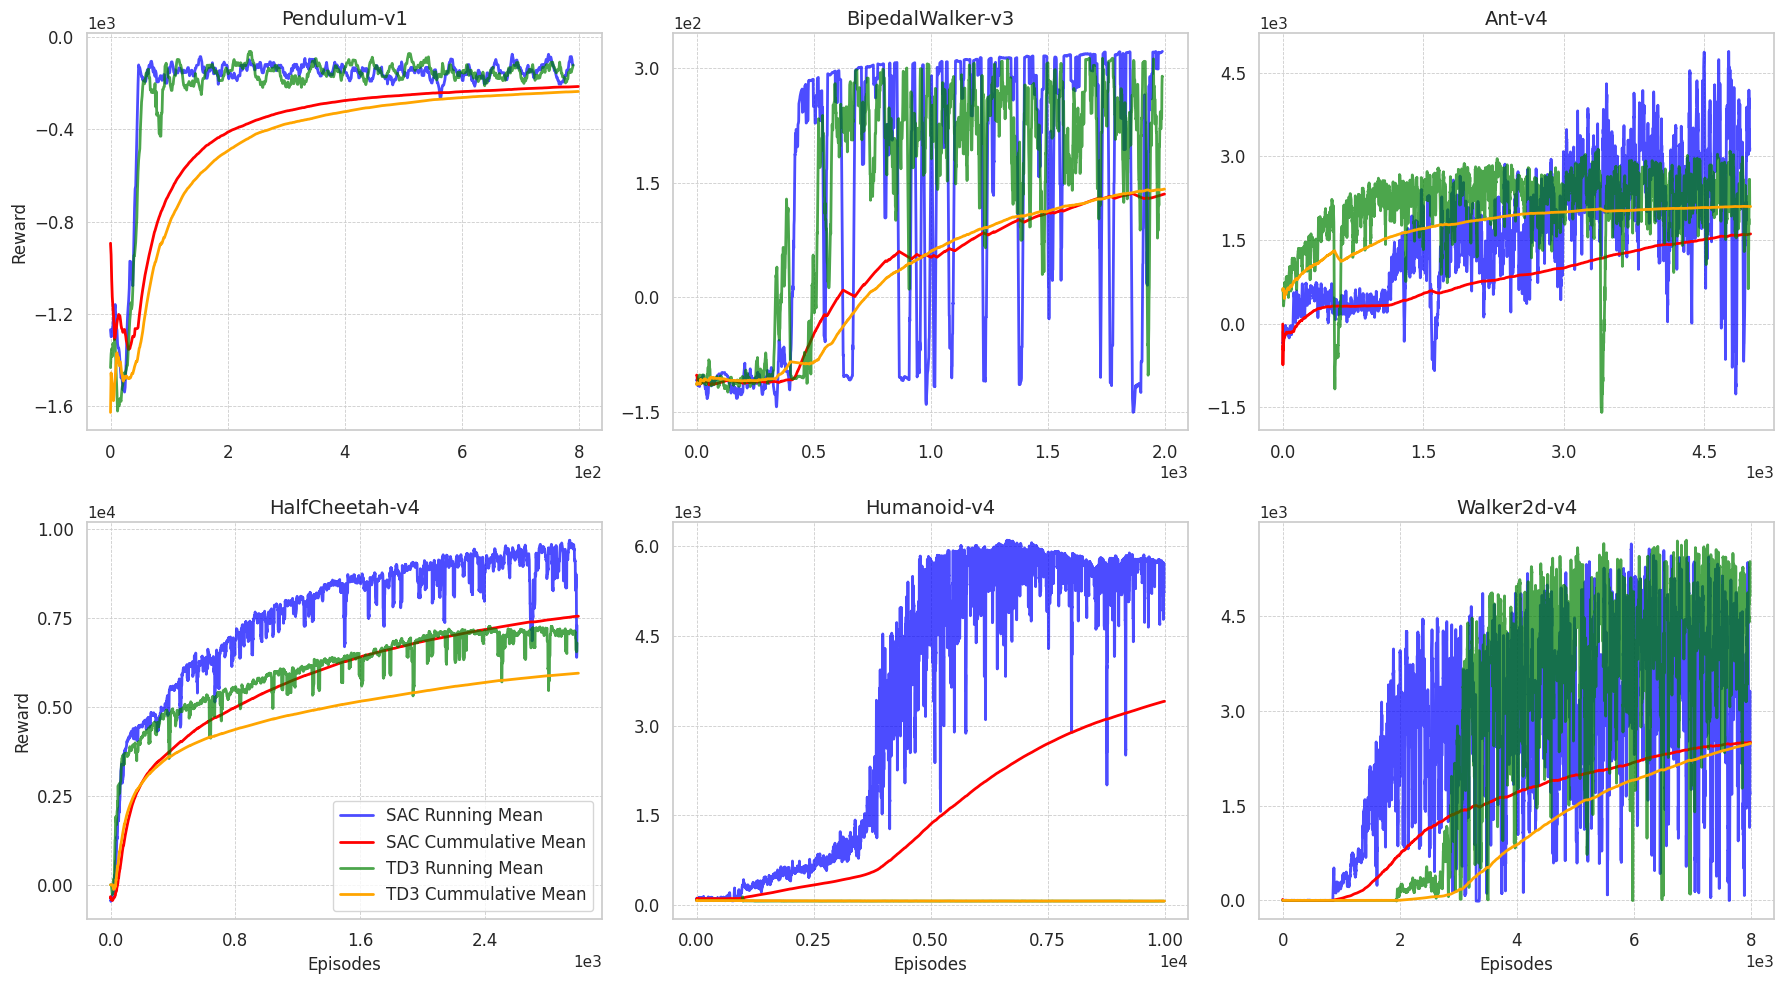

In [10]:
size = len(env_names)

sns.set(style="whitegrid")

half_size = size//2
fig, ax = plt.subplots(2, half_size, figsize=(6*half_size, 10)) 

for a in ax.flatten():
    a.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))
    a.xaxis.set_major_locator(MaxNLocator(nbins=5))
    a.yaxis.set_major_locator(MaxNLocator(nbins=5))
    a.grid(True, which='both', linestyle='--', linewidth=0.6)  
    a.tick_params(axis='both', which='major', labelsize=12) 


experiment_number = '01'
for algorithm in algorithms:
    color_rm = 'blue' if algorithm == 'SAC' else 'green' 
    color_cm = 'red' if algorithm == 'SAC' else 'orange'
    for i, env_name in enumerate(env_names):
        rewards = data[f'{algorithm}_{env_name}_{experiment_number}']
        rewards_rm = running_mean(rewards)
        rewards_cm = cummulative_mean(rewards)
        if algorithm == 'SAC':
            sns.lineplot(x=np.arange(len(rewards_rm)), y=rewards_rm, ax=ax[i//half_size][i%half_size], color=color_rm, linewidth=2, alpha=0.7, label='SAC Running Mean')
            sns.lineplot(x=np.arange(len(rewards_cm)), y=rewards_cm, ax=ax[i//half_size][i%half_size], color=color_cm, linewidth=2, label='SAC Cummulative Mean')
        else:
            sns.lineplot(x=np.arange(len(rewards_rm)), y=rewards_rm, ax=ax[i//half_size][i%half_size], color=color_rm, linewidth=2, alpha=0.7, label='TD3 Running Mean')
            sns.lineplot(x=np.arange(len(rewards_cm)), y=rewards_cm, ax=ax[i//half_size][i%half_size], color=color_cm, linewidth=2, label='TD3 Cummulative Mean')
        ax[i//half_size][i%half_size].set_title(f'{env_name}', fontsize=14)
        if i == 0 or i == half_size + 1:
            ax[i//half_size][0].set_ylabel('Reward', fontsize=12)
        if i//half_size == 1:
            ax[i//half_size][i%half_size].set_xlabel('Episodes', fontsize=12)
            
for i, a in enumerate(ax.flatten()):
    if half_size == 2 and i == 3:
        a.legend(loc='lower right', fontsize=12)
    elif half_size == 3 and i == 3:
        a.legend(loc='lower right', fontsize=12)
    else:
        a.legend().remove()

plt.tight_layout()
plt.show()

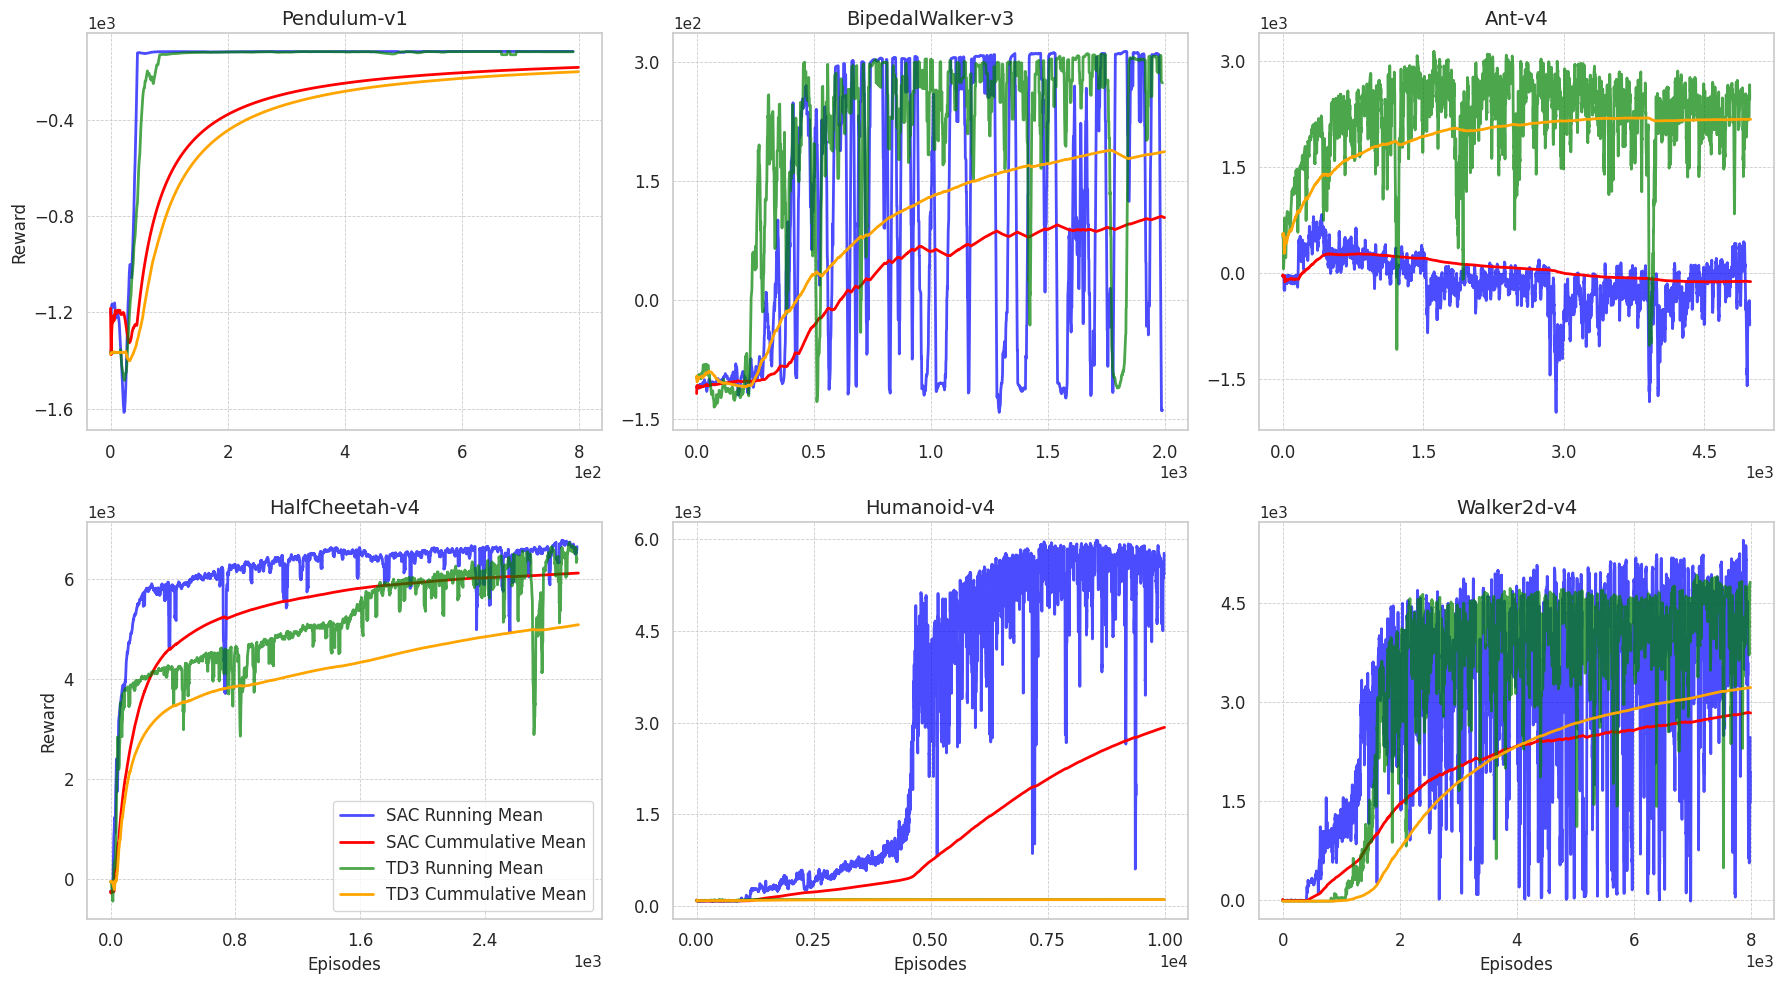

In [11]:
size = len(env_names)

sns.set(style="whitegrid")

half_size = size//2
fig, ax = plt.subplots(2, half_size, figsize=(6*half_size, 10)) 

for a in ax.flatten():
    a.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))
    a.xaxis.set_major_locator(MaxNLocator(nbins=5))
    a.yaxis.set_major_locator(MaxNLocator(nbins=5))
    a.grid(True, which='both', linestyle='--', linewidth=0.6)  
    a.tick_params(axis='both', which='major', labelsize=12) 


experiment_number = '02'
for algorithm in algorithms:
    color_rm = 'blue' if algorithm == 'SAC' else 'green' 
    color_cm = 'red' if algorithm == 'SAC' else 'orange'
    for i, env_name in enumerate(env_names):
        rewards = data[f'{algorithm}_{env_name}_{experiment_number}']
        rewards_rm = running_mean(rewards)
        rewards_cm = cummulative_mean(rewards)
        if algorithm == 'SAC':
            sns.lineplot(x=np.arange(len(rewards_rm)), y=rewards_rm, ax=ax[i//half_size][i%half_size], color=color_rm, linewidth=2, alpha=0.7, label='SAC Running Mean')
            sns.lineplot(x=np.arange(len(rewards_cm)), y=rewards_cm, ax=ax[i//half_size][i%half_size], color=color_cm, linewidth=2, label='SAC Cummulative Mean')
        else:
            sns.lineplot(x=np.arange(len(rewards_rm)), y=rewards_rm, ax=ax[i//half_size][i%half_size], color=color_rm, linewidth=2, alpha=0.7, label='TD3 Running Mean')
            sns.lineplot(x=np.arange(len(rewards_cm)), y=rewards_cm, ax=ax[i//half_size][i%half_size], color=color_cm, linewidth=2, label='TD3 Cummulative Mean')
        ax[i//half_size][i%half_size].set_title(f'{env_name}', fontsize=14)
        if i == 0 or i == half_size + 1:
            ax[i//half_size][0].set_ylabel('Reward', fontsize=12)
        if i//half_size == 1:
            ax[i//half_size][i%half_size].set_xlabel('Episodes', fontsize=12)
            
for i, a in enumerate(ax.flatten()):
    if half_size == 2 and i == 3:
        a.legend(loc='lower right', fontsize=12)
    elif half_size == 3 and i == 3:
        a.legend(loc='lower right', fontsize=12)
    else:
        a.legend().remove()

plt.tight_layout()
plt.show()